[原版（英文）图书地址](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/)

**翻译**：[apachecn](https://github.com/apachecn)，[翻译版本地址](https://github.com/apachecn/feature-engineering-for-ml-zh)

**代码修改和整理**：[黄海广](https://github.com/fengdu78)，原文修改成jupyter notebook格式，并增加和修改了部分代码，测试全部通过，所有数据集已经放在[百度云](data/README.md)下载。

# 二、简单数字的奇特技巧

> 译者：[@coboe](https://github.com/coboe)
> 
> 校对者：[@ZiseonJiao](https://github.com/emengjzs)

在深入研究诸如文本和图像这样的复杂数据类型之前，让我们先从最简单的数字数据开始。它们可能来自各种来源：地理位置或人、购买的价格、传感器的测量、交通计数等。数字数据已经是数学模型容易消化的格式。这并不意味着不再需要特征工程。好的特征不仅代表数据的显著方面，而且符合模型的假设。因此，转换常常是必要的。数字特征工程技术是基础。当原始数据被转换为数字特征时，它们可以被应用。

数值数据的第一个健全检查是大小是否重要。我们只需要知道它是正面的还是负面的？或者我们只需要知道一个非常粗粒度的大小？这一明智的检查对于自动累积数尤其重要，比如统计，每天访问网站的次数，餐馆所获得的评论数量等等。

接下来，考虑特征的规模。最大值和最小值是什么？它们跨越几个数量级吗？输入特性平滑的模型对输入的尺度敏感。例如，3x+ 1是输入X的简单线性函数，其输出的规模直接取决于输入的比例。其他例子包括k-均值聚类，最近邻居方法，RBF内核，以及使用欧几里得距离的任何东西。对于这些模型和建模组件，通常规范化特征以使输出保持在预期的规模上通常是一个好主意。

另一方面，逻辑函数对输入特征量表不敏感。无论输入是什么，它们的输出都是二进制的。例如，逻辑，并采取任何两个变量和输出1，当且仅当两个输入均为真。逻辑函数的另一个例子是阶跃函数“输入x大于5”。决策树模型由输入特征的阶跃函数组成。因此，基于空间划分树（决策树、梯度提升机、随机森林）的模型对尺度不敏感。唯一的例外是如果输入的规模随着时间的增长而增长，那么如果该特征是某种类型的累积计数。最终它将生长在树被训练的范围之外。如果可能是这样的话，那么就有必要周期性地重新调整输入。另一个解决方案是第5章讨论的bin计数方法。

考虑数值特征的分布也是很重要的。分布总结了承担特定价值的可能性。输入特征的分布对某些模型比其他模型更重要。例如，线性回归模型的训练过程假定预测误差分布得像高斯。这通常是好的，除非预测目标在几个数量级上扩散。在这种情况下，高斯误差假设可能不再成立。解决这一问题的一种方法是转变产出目标，以驯服规模的增长。（严格地说，这将是目标工程，而不是特征工程。）对数变换，这是一种功率变换，将变量的分布接近高斯。另一个解决方案是第5章讨论的bin计数方法。

除了裁剪模型或培训过程的假设, 多个功能可以组合成更复杂的功能。希望复杂的功能能够更简洁地捕捉原始数据中的重要信息。通过使输入功能更加 "雄辩", 模型本身可以更简单, 更容易进行培训和评估, 并做出更好的预测。作为一个极端的, 复杂的特点本身可能是统计模型的输出。这是一个称为模型堆叠的概念, 我们将在7章和8章中更详细地讨论。在本章中, 我们给出了复杂特征的最简单示例: 交互功能。

交互特征易于制定，但特征的组合导致更多的输入到模型中。为了减少计算开销，通常需要使用自动特征选择来修剪输入特征。

我们将从标量、向量和空间的基本概念开始，然后讨论尺度、分布、交互特征和特征选择。

## 标量、向量和空间

在我们开始之前, 我们需要定义一些基本概念, 这本书的其余部分。单个数字特征也称为标量。标量的有序列表称为向量。向量位于向量空间中。在绝大多数机器学习应用中, 对模型的输入通常表示为数字向量。本书的其余部分将讨论将原始数据转换为数字向量的最佳实践策略. 

向量可以被可视化为空间中的一个点。（有时人们从原点到那一点画一条线和一个箭头。在这本书中，我们将主要使用这一点。例如，假设我们有一个二维向量$v=[1，-1]$。也就是说，向量包含两个数，在第一方向$d1$中，向量具有1的值，并且在第二方向$d2$中，它具有$-1$的值。我们可以在二维图中绘制$v$。

![A single vector](images/chapter2/A_single_vector.png)

**Figure 2-1. A single vector.**

在数据世界中, 抽象向量及其特征维度具有实际意义。例如, 它可以代表一个人对歌曲的偏爱。每首歌都是一个特征, 其中1的值相当于大拇指向上,$-1$ 个拇指向下。假设向量 $v$ 表示一个听众 Bob 的喜好。Bob喜欢 Bob Dylan 的  “Blowin’ in the Wind” 和 Lady Gaga 的 "Poker Face"。其他人可能有不同的喜好。总的来说, 数据集合可以在特征空间中可视化为点云. 

相反，一首歌可以由一组人的个人喜好来表示。假设只有两个听众，Alice 和 Bob。Alice 喜欢 Leonard Cohen 的 “Poker Face”, “Blowin’ in the Wind” 和 “Hallelujah”，但讨厌 Katy Perry 的 “Roar” 和 Radiohead 的 “Creep”。Bob 喜欢 “Roar", “Hallelujah”和“Blowin’ in the Wind”，但讨厌 “Poker Face” 和 “Creep” 。在听众的空间里，每一首歌都是一个点。就像我们可以在特征空间中可视化数据一样，我们可以在数据空间中可视化特征。图2-2显示了这个例子。

![Illustration of feature space vs. data space](images/chapter2/Illustration_of_feature_space_vs_data_space.png)

**Figure 2-2. Illustration of feature space vs. data space.**

## 处理计数

在大数据时代，计数可以快速积累而不受约束。用户可以将歌曲或电影放在无限播放中，或者使用脚本反复检查流行节目的门票可用性，这会导致播放次数或网站访问计数迅速上升。当数据可以以高的体积和速度产生时，它们很可能包含一些极值。这是一个好主意，检查他们的规模，并确定是否保持它们作为原始数字，将它们转换成二进制变量，以指示存在，或将它们放入粗粒度。

## 二值化

Million Song 数据集中的用户品味画像包含了一百万个用户在 Echo Nest 的完整音乐聆听历史。下面是有关数据集的一些相关统计数据。

###  Echo Nest 品味画像数据集的统计

- 有超过4800万个用户ID、音乐ID和监听计数三元组。
- 完整的数据集包含1019318个独特用户和384546首独特歌曲。
- 引文：Echo Nest 品味画像的数据子集，官方的 Million Song 数据集的用户数据集，可从这里获得：http://labrosa.ee.columbia.edu/millionsong/tasteprofile

假设任务是建立一个推荐器向用户推荐歌曲。推荐器的一个组件可以预测用户将对一首特别的歌曲会有多少喜欢。由于数据包含实际的听歌次数，这应该是预测的目标吗？如果一个大的听计数意味着用户真的喜欢这首歌，反之亦然，那是正确的。然而，数据表明，虽然99%的听计数是24或更低，也有一些听计数数以千计，最大为9667。（如图2-3所示，直方图最接近于0的bin中的峰值。但是超过10000个三元组的计数更大，几千个则有几个。这些值异常大；如果我们试图预测实际的听计数，那么模型将被这些大的值拉离。

![Histogram of listen counts in the user taste profile of the Million Song Dataset. Note that the y-axis is on a log scale.](images/chapter2/listen_count.png)

**Figure 2-3. Histogram of listen counts in the user taste profile of the Million Song Dataset. Note that the y-axis is on a log scale.**

在 Million Song 数据集中，原始监听计数不是用户口味的可靠度量。（在统计术语中，健壮性意味着该方法在各种各样的条件下工作。）用户有不同的听力习惯。有些人可能把他们最喜欢的歌曲放在无限的循环中，而其他人可能只在特殊的场合品尝它们。很难说听一首歌20次的人一定喜欢听10次的人的两倍。

用户偏好的更健壮表示是使计数二元化和修剪所有大于1的计数为1。换句话说，如果用户至少听过一首歌，那么我们将其视为用户喜欢歌曲。这样，模型不需要花费周期来预测原始计数之间的微小差异。二进制目标是用户偏好的简单而稳健的度量。

### 例2-1:使 Million Song 数据集中听歌计数二进制化

In [7]:
import pandas as pd
# listen_count = pd.read_csv(
#     '../../../pytorchLearnResource/Data/data/train_triplets.txt', header=None, delimiter='\t')
# # The table contains user-song-count triplets. Only non-zero counts are
# # included. Hence to binarize the count, we just need to set the entire
# # count column to 1.
#
# listen_count[2] = 1

这是我们设计模型目标变量的一个例子。严格地说, 目标不是一个特征, 因为它不是输入。但有时我们确实需要修改目标以解决正确的问题。

## 量化或装箱

对于本练习, 我们从第 6 轮 Yelp 数据集挑战中采集数据, 并创建一个更小的分类数据集。Yelp 数据集包含用户对来自北美和欧洲十个城市的企业的评论。每个商户都标记为零个或多个类别。以下是有关数据集的相关统计信息。

### 关于第 6 轮 Yelp 数据集的统计

- 有782种商户类别。
- 完整的数据集包含 1569264 个（约1.6M）评论和 61184 个（61K）商户。
- “餐厅”（990627个评论）和“夜生活”（210028个评论）是最流行的类别，评论计数是明智的。
- 没有一个商户同时属于餐厅和夜生活分类。因此，这两组评论之间没有重叠。

每个商户都有一个评论计数。假设我们的任务是使用协同过滤来预测用户可能给企业的评级。评论计数可能是一个有用的输入特征，因为通常在流行和良好的评级之间有很强的相关性。现在的问题是，我们应该使用原始评论计数或进一步处理它吗？图2-4显示了所有商户评论计数的直方图。我们看到和音乐听歌计数一样的模式。大部分的统计数字都很小，但一些企业有成千上万的评论。

### 例2-2:在YELP数据集中可视化商户评论计数

In [8]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
### Load the data about businesses
biz_file = open('data/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()
biz_df.head()

,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type
0,rncjoVoEFUJGCUoC1JgnUA,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",True,"[Accountants, Professional Services, Tax Servi...",Peoria,3,Peoria Income Tax Service,[],-112.241596,AZ,5.0,33.581867,business
1,0FNFSzCFP_rGUoJx8W7tJg,"2149 W Wood Dr\nPhoenix, AZ 85029",True,"[Sporting Goods, Bikes, Shopping]",Phoenix,5,Bike Doctor,[],-112.105933,AZ,5.0,33.604054,business
2,3f_lyB6vFK48ukH6ScvLHg,"1134 N Central Ave\nPhoenix, AZ 85004",True,[],Phoenix,4,Valley Permaculture Alliance,[],-112.073933,AZ,5.0,33.460526,business
3,usAsSV36QmUej8--yvN-dg,"845 W Southern Ave\nPhoenix, AZ 85041",True,"[Food, Grocery]",Phoenix,5,Food City,[],-112.085377,AZ,3.5,33.392210,business
4,PzOqRohWw7F7YEPBz6AubA,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",True,"[Food, Bagels, Delis, Restaurants]",Glendale Az,14,Hot Bagels & Deli,[],-112.200264,AZ,3.5,33.712797,business


Text(0, 0.5, 'Occurrence')

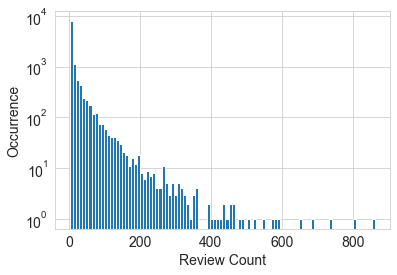

In [10]:
### Plot the histogram of the review counts
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

**Figure 2-4. Histogram of business review counts in the Yelp reviews dataset. The y-axis is on a log-scale.**

对于许多模型来说，跨越数个数量级的原始计数是有问题的。在线性模型中，相同的线性系数必须对计数的所有可能值工作。大量的计数也可能破坏无监督学习方法，如k-均值聚类，它使用相似性函数来测量数据点之间的相似性。k-均值使用数据点之间的欧几里得距离。数据向量的一个元素中的大计数将超过所有其他元素中的相似性，这可能会丢弃整个相似性度量。

一种解决方案是通过量化计数来包含标量。换句话说，我们将计数分组到容器中，并且去掉实际的计数值。量化将连续数映射成离散数。我们可以把离散化的数字看作是代表强度度量的容器的有序的序列。

为了量化数据，我们必须决定每一个箱子应该有多宽。解决方案分为固定宽度或自适应两种类型。我们将给出每个类型的例子。

### 固定宽度装箱

对于固定宽度装箱, 每个 bin 都包含一个特定的数值范围。范围可以是定制设计或自动分割, 它们可以线性缩放或指数缩放。例如, 我们可以将一个人的年龄分组为十年: 0-9 岁归纳到bin 1, 10-19 年归纳到 bin 2 等。要从计数映射到 bin, 只需除以 bin 的宽度并取整部分。

也经常看到定制设计的年龄范围更适合于生活的阶段：
- 0-12 岁
- 12-17 岁
- 18-24 岁
- 25-34 岁
- 35-44 岁
- 45-54 岁
- 55-64 岁
- 65-74 岁
- 75 岁以上


当数字跨越多个数量级时，最好用10个幂（或任何常数的幂）来分组：0－9、10-99、100-999、100-9999等。容器宽度呈指数增长，从O（10）、O（100）到O（1000）和以上。要从计数映射到bin，取计数的log值。指数宽度的划分与对数变换非常相关，我们在“对数变换”中讨论。

### 例2-3:用固定宽度的箱进行量化计数

In [11]:
import numpy as np
### Generate 20 random integers uniformly between 0 and 99
small_counts = np.random.randint(0, 100, 20)
small_counts

array([93, 82, 77, 25, 49, 34, 71, 25, 55, 41, 33, 72, 86, 56, 34, 51, 76,
       79, 39, 72])

In [12]:
np.floor_divide(small_counts, 10)

array([9, 8, 7, 2, 4, 3, 7, 2, 5, 4, 3, 7, 8, 5, 3, 5, 7, 7, 3, 7],
      dtype=int32)

In [13]:
### An array of counts that span several magnitudes
large_counts = [
    296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971,
    926, 122, 22222
]

In [14]:
### Map to exponential-width bins via the log function
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### 分位数装箱

固定宽度装箱很容易计算。但是如果计数有很大的差距, 那么将会有许多空的垃圾箱没有数据。该问题可以通过基于数据分布的垃圾箱自适应定位来解决。这可以使用分发的分位数来完成。

分位数是将数据划分为相等部分的值。例如, 中位数将数据分成一半;一半的数据是较小的, 一半大于中位数。分位数把数据分成几个部分, 十分位数把数据划分成十份。示例2-4 演示如何计算 Yelp 商户评论数的十等分, 图2-5 覆盖直方图上的十等分。这就更清楚地说明了对更小的计数的歪斜。

### 例 2-4:计算 Yelp 商户评论数的十分位数

In [15]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    12.0
0.8    23.0
0.9    50.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurrence')

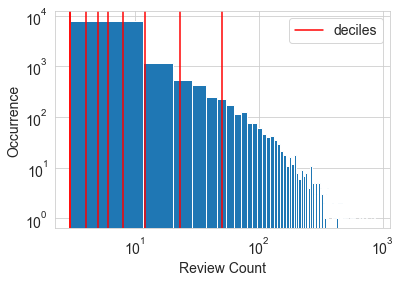

In [16]:
### Visualize the deciles on the histogram
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

**Figure 2-5. Deciles of the review counts in the Yelp reviews dataset. Note that both x- and y-axes are in log scale.**

为了计算分位数和映射数据到分位数箱，我们可以使用 `Pandas` 库。 `pandas.DataFrame.quantile` 和 `pandas.Series.quantile` 用于计算分位数。`pandas.qcut`将数据映射到所需数量的分位数。

### 例2-5:按分位数分箱计数

In [17]:
### Continue example Example 2-3 with large_counts
import pandas as pd
### Map the counts to quartiles
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3], dtype=int64)

In [18]:
### Compute the quantiles themselves
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

## 对数转换

在“量化或装箱”中，我们简要地介绍了把计数的对数映射到指数宽度箱的概念。让我们现在再看一看。

对数函数是指数函数的逆。它定义为$\log _{a}\left({a}^{x}\right)=X$
其中 $a$ 为正常数, $x$ 可以是任何正数。由于$a^0=1$,我们有$\log _{{a}}(1)=0$。这意味着对数函数将小范围的数字 (0、1) 映射到负数的整个范围$(-\infty, 0)$。函数$\log _{{a}}(10)=0$ 将 $[1、10]$ 映射到 $[0、1]$、将$[10、100]$ 映射到 $[1、2]$ 等等。换言之, 对数函数压缩大数的范围, 并扩展小数的范围。越大的 $x$ , $log(x)$的增量越慢。通过查看 $log$ 函数的图像, 可以更容易地消化这一点。(见图2-6)。


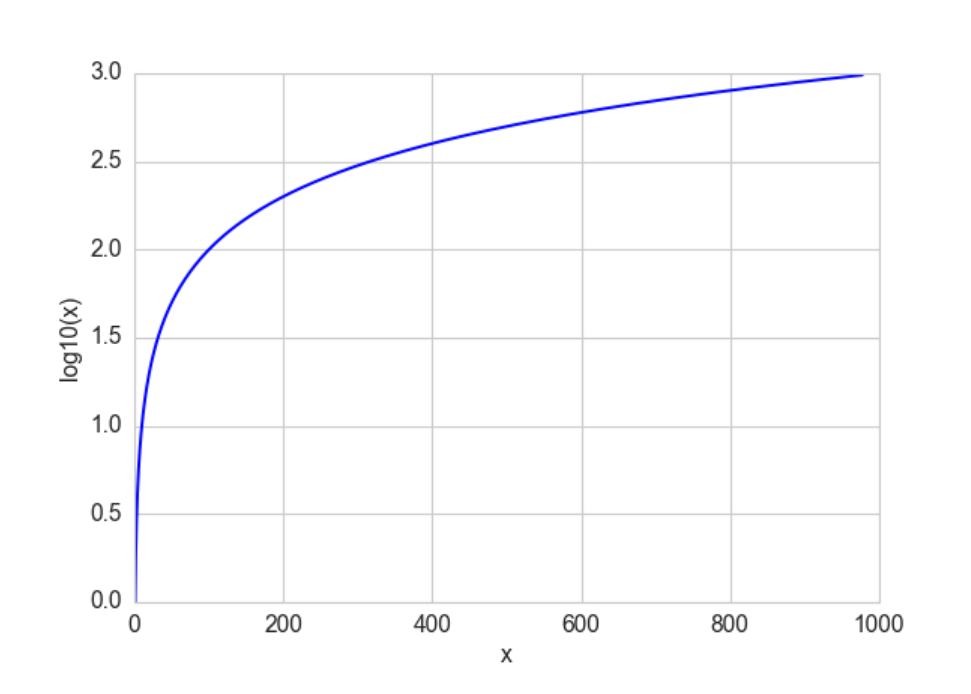

**Figure 2-6. The log function compresses the high numeric range and expands the low range. Note how the horizontal x values from 100 to 1000 got compressed into just 2.0 to 3.0 in the vertical y range, while the tiny horizontal portion of x values less than 100 are mapped to the rest of the vertical range.**

对数变换是处理具有重尾分布的正数的有力工具。（重尾分布在尾部范围内的概率比高斯分布的概率大）。它将分布在高端的长尾压缩成较短的尾部，并将低端扩展成较长的头部。图2-7比较d对数转换之前和之后的YELP商户评论计数的直方图。Y轴现在都在正常（线性）尺度上。在$(0.5,1)$范围内的底部图中增加的仓间隔是由于在1和10之间只有10个可能的整数计数。请注意，原始审查计数非常集中在低计数区域，离群值在4000以上。对数变换后，直方图不集中在低端，更分散在X轴上。

### 例2-6:可视化对数变换前后评论数分布

Text(23.625, 0.5, 'Occurrence')

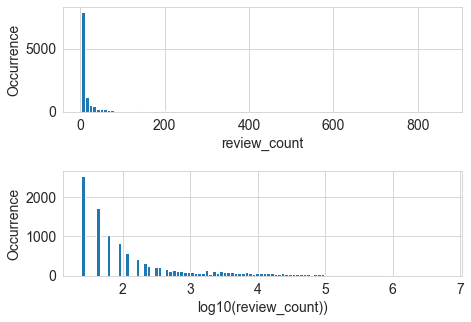

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.tight_layout(pad=0, w_pad=4.0, h_pad=4.0)
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)
biz_df['log_review_count'] = np.log(biz_df['review_count'] + 1)
biz_df['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)

**Figure 2-7. Comparison of Yelp business review counts before (top) and after (bottom) log transformation.**

另一个例子是来自 UC Irvine 机器学习库的在线新闻流行数据集。以下是有关数据集的相关统计信息。

### 在线新闻流行数据集的统计

- 该数据集包括 MasHabor 在两年的时间内出版的 39797 个新闻文章的60个特征。
- 引证: K. Fernandes, P. Vinagre 和 P. Cortez . 一种用于预测在线新闻的流行程度的主动智能决策支持系统。2015 第十七届 EPIA 活动, 葡萄牙人工智能会议论文集, 9月, 葡萄牙科英布拉。

目的是利用这些特征来预测文章在社交媒体上的用分享数量表示的流行度。在本例中, 我们将只关注一个特征——文章中的单词数。图2-8 显示了对数转换前后特征的直方图。请注意, 在对数转换后, 分布看起来更高斯, 除了长度为零的文章 (无内容) 的断裂。

In [20]:
df = pd.read_csv('data/OnlineNewsPopularity.csv', delimiter=', ')

d:\pyprojectin\pytorch\venv\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'data/OnlineNewsPopularity.csv'

In [ ]:
df.head()

In [ ]:
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

### 例2-7:可视化在有对数变换和没有对数变换时新闻文章流行度的分布

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.tight_layout(pad=0, w_pad=4.0, h_pad=4.0)
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)

df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)

**Figure 2-8. Comparison of word counts in Mashable news articles before (top) and after (bottom) log transformation.**

## 对数转换实战

让我们看看在监督学习中对数转换如何执行。我们将使用上面的两个数据集。对于 Yelp 评论数据集, 我们将使用评论的数量来预测商户的平均评级。对于 Mashable 的新闻文章, 我们将使用文章中的字数来预测其流行程度。由于输出是连续的数字, 我们将使用简单的线性回归作为模型。我们在没有对数变换和有对数变换的特色上，使用 Scikit Learn 执行10折交叉验证的线性回归。模型由 R 方评分来评估, 它测量训练后的回归模型预测新数据的良好程度。好的模型有较高的 R 方分数。一个完美的模型得到最高分1。分数可以是负的, 一个坏的模型可以得到一个任意低的负评分。通过交叉验证, 我们不仅得到了分数的估计, 还获得了方差, 这有助于我们判断两种模型之间的差异是否有意义。

### 例2-8:使用对数转换 YELP 评论数预测平均商户评级

In [ ]:
import pandas as pd
import numpy as np
import json
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [ ]:
## Using the previously loaded Yelp reviews dataframe,
## compute the log transform of the Yelp review count.
## Note that we add 1 to the raw count to prevent the logarithm from
## exploding into negative infinity in case the count is zero.
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

In [ ]:
biz_df.head()

In [ ]:
## Train linear regression models to predict the average stars rating of a business,
## using the review_count feature with and without log transformation
## Compare the 10-fold cross validation score of the two models
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(
    m_orig, biz_df[['review_count']], biz_df['stars'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(
    m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" %
      (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" %
      (scores_log.mean(), scores_log.std() * 2))

从实验的结果来看, 两个简单的模型 (有对数变换和没有对数变换) 在预测目标时同样不好, 而有对数变换的特征表现略差。真令人失望!这并不奇怪, 他们都不是很好, 因为他们都只使用一个功能。但是, 人们本来希望日志转换的功能执行得更好。

让我们看看对数转换在线新闻流行数据集上如何表现。

### 例2-9:利用经过对数转换在线新闻数据中的词数量预测文章流行度

In [ ]:
## Download the Online News Popularirty dataset from UCI, then use
## Pandas to load the file into a dataframe

## Take the log transform of the 'n_tokens_content' feature, which
## represents the number of words (tokens) in a news article.
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

## Train two linear regression models to predict the number of shares
## of an article, one using the original feature and the other the
## log transformed version.
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(
    m_orig, df[['n_tokens_content']], df['shares'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(
    m_log, df[['log_n_tokens_content']], df['shares'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" %
      (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" %
      (scores_log.mean(), scores_log.std() * 2))

置信区间仍然重叠，但具有对数变换特征的模型比没有对数变换的表现更好。为什么对数转换在这个数据集上更成功？我们可以通过观察输入特征和目标值的散点图来得到线索。如图2-9的底部面板所示，对数变换重塑了$X$轴，将目标值（大于200000个份额）中的大离群值进一步拉向轴的右手侧。这给线性模型在输入特征空间的低端更多的“呼吸空间”。没有对数转换（上部面板），在输入值变化下非常小的情况下，模型有更大的压力下适应非常不同的目标值。

### 例2-10:可视化新闻流程度预测问题中输入输出相关性

In [ ]:
fig2, (ax1, ax2) = plt.subplots(2, 1,figsize=(10, 4))
fig.tight_layout(pad=0.4, w_pad=4.0, h_pad=6.0)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)


**Figure 2-9. Scatter plot of number of words (input) vs. number of shares (target) in the Online News dataset. The top plot visualizes the original feature, and the bottom plot shows the scatter plot after log transformation.**

将此与应用于YELP评论数据集的相同散点图进行比较。图2-10看起来与图2-9非常不同。在1到5，步长0.5的区间，平均星级是离散的。高评论计数（大致＞2500评论）与较高的平均星级评级相关。但这种关系远不是线性的。没有一种清晰的方法可以根据输入来预测平均星级。从本质上讲，该图表明，评论数及其对数都是平均星级的不良线性预测因子。

In [ ]:
### 例2-11。可视化 Yelp 商户评论预测中输入与输出的相关性。
fig, (ax1, ax2) = plt.subplots(2,1)
fig.tight_layout(pad=0, w_pad=4.0, h_pad=4.0)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

**Figure 2-10. Scatter plot of review counts (input) vs. average star ratings (target) in the Yelp Reviews dataset. The top panel plots the original review count, and the bottom panel plots the review count after log transformation.**

## 数据可视化的重要性

对数变换在两个不同数据集上的影响的比较，说明了可视化数据的重要性。在这里，我们故意保持输入和目标变量简单，以便我们可以很容易地可视化它们之间的关系。如图2-10所示的曲线，立即显示所选择的模型（线性）不可能代表所选择的输入和目标之间的关系。另一方面，人们可以令人信服地在给定平均星级模拟评论数的分布。在建立模型时，最好直观地检查输入和输出之间的关系，以及不同输入特征之间的关系。

### 功率变换：对数变换的推广

对数变换是一个称为功率变换的变换族的特殊例子。在统计方面，这些是方差稳定的变换。为了理解为什么方差稳定是好的，考虑泊松分布。这是一个方差等于它的平均值的重尾分布。因此，它的质量中心越大，其方差越大，尾部越重。功率变换改变变量的分布，使得方差不再依赖于平均值。例如，假设一个随机变量X具有泊松分布。假如我们使用开平方根变换$X$, $\widetilde{X}=\sqrt{X}$的方差大致是恒定的, 而不是等于平均值。

![](../images/chapter2/2-11.png)

**Figure 2-11. A rough illustration of the Poisson distribution. λ represents the mean of the distribution. As λ increases, not only does the mode of of the distribution shift to the right, but the mass spreads out and the variance becomes larger. The Poisson distribution is an example distribution where the variance increases along with the mean.**

平方根变换和对数变换的简单推广称为Box-Cox变换：
$$
\tilde{x}=\left\{\begin{array}{ll}{\frac{x^{2}-1}{\lambda}} & {\text { if } \lambda \neq 0} \\ {\ln (x)} & {\text { if } \lambda=0}\end{array}\right.
$$


图2-12， 展示出了在  $\lambda =0$（log变换），$\lambda =0.25$,$\lambda =0.5$（平方根的缩放和移位版本），$\lambda =0.75$, 和$\lambda =1.5$时的Box-Cox变换。设置$\lambda$ 小于1时压缩较高的值，并且设置$\lambda$大于1时具有相反的效果。

![](images/chapter2/2-12.png)

**Figure 2-12. Box-Cox transforms for different values of $\lambda$.**

只有当数据为正值时, Box-Cox 公式才能工作。对于非正数据, 可以通过加上固定常量来移动数值。当应用 Box-Cox 变换或更一般的功率变换时, 我们必须确定参数 $\lambda$ 的值。这可能是通过最大似然(找到的$\lambda$,使产生的变换信号的高斯似然最大) 或贝叶斯方法。完全介绍 Box-Cox 和一般功率变换的使用超出了本书的范围。感兴趣的读者可以通过 Jack Johnston 和John DiNardo (McGraw Hill) 编写的Econometric Methods 找到更多关于幂转换的信息。幸运的是, Scipy 的数据包包含了一个 Box-Cox 转换的实现, 其中包括查找最佳变换参数。

### 例2-12:Yelp商户评论数的 Box-Cox 变换

In [ ]:
from scipy import stats

# Continuing from the previous example, assume biz_df contains
# the Yelp business reviews data
# Box-Cox transform assumes that input data is positive.
# Check the min to make sure.
biz_df['review_count'].min()

In [ ]:
biz_df.columns

In [ ]:
# Setting input parameter lmbda to 0 gives us the log transform (without constant offset)
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)

In [ ]:
biz_df['rc_log']=rc_log

In [ ]:
# By default, the scipy implementation of Box-Cox transform finds the lmbda parameter
# that will make the output the closest to a normal distribution
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

In [ ]:
biz_df['rc_bc']=rc_bc

图2-13 提供了原始和转换评论数分布的可视化比较。

In [ ]:
### 例2-13。可视化评论数的原始、对数转换和 Box-Cox 转换的直方图。

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.tight_layout(pad=0, w_pad=4.0, h_pad=4.0)
# original review count histogram
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# review count after log transform
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# review count after optimal Box-Cox transform
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

**Figure 2-13. Box-Cox transformation of Yelp business review counts.**

概率图是一种直观地比较数据分布与理论分布的简单方法。这本质上是观察到散点图的与理论分位数。图2-14显示YELP评论数的原始数据和转换后数据相对正态分布的概率图。由于观测数据是严格正的，高斯可以是负的，所以分位数在负端上永远不会匹配。所以我们关注的是正数这的一边。在这方面，原始评论数明显比正常分布更重尾。（有序值上升到4000，而理论位数仅延伸到4）。简单的对数变换和最优的 Box-Cox 变换都使正尾部接近正态分布。最优的 Box-Cox 变换比对数变换更缩小尾部，由于尾部在红色对角线等值线下平展可以明显看出。

### 例 2-14:原始和变换后的数据相对正态分布的概率图

In [ ]:

fig2, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6))
# fig.tight_layout(pad=4, w_pad=5.0, h_pad=0.0)
prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')
prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')


**Figure 2-14. Comparing the distribution of raw and transformed review counts against the Normal distribution.**

## 特征缩放或归一化

某些特征的值有界的，如纬度或经度。其他数值特征 (如数量) 可能会在无界的情况下增加。那些关于输入是平滑函数的模型, 如线性回归、逻辑回归或任何涉及矩阵的东西, 都受输入的数值范围影响。另一方面, 基于树的模型不太在意这个。如果你的模型对输入特征的数值范围敏感, 则特征缩放可能会有所帮助。顾名思义, 特征缩放会更改特征值的数值范围。有时人们也称它为特征规范化。功能缩放通常分别针对单个特征进行。有几种常见的缩放操作, 每个类型都产生不同的特征值分布。

### Min-max缩放

设$X$是一个单独的特征值（即，在某些数据点中的一个特征值），以及 $min(x)$ 和 $max(x)$ ，分别是整个数据集上该特征的最小值和最大值。Min-max缩放压缩（或拉伸）所有特征值到$[0, 1 ]$的范围内。图2-15演示了这个概念。最小最大尺度的公式是

$$
\widetilde{x}=\frac{x-\min (x)}{\max (x)-\min (x)}
$$

![](../images/chapter2/2-15.png)

**Figure 2-15. Min-max scaling**

### 标准化（方差缩放）

特征标准化的定义为：

$$
\widetilde{x}=\frac{x-\operatorname{mean}(x)}{\operatorname{var}(x)}
$$

减去特征 (所有数据点) 的平均值并除以方差。因此, 它也可以称为方差缩放。缩放后的特征的平均值为0, 方差为1。如果原始特征具有高斯分布, 则缩放特征为标准高斯。图2-16 包含了标准化的说明。

![](images/chapter2/2-16.png)

**Figure 2-16. Illustration of feature standardization**

## 不要中心化稀疏数据

最小最大缩放和标准化都从原始特征值中减去一个数量。对于最小最大缩放, 移动量是当前特征的所有值中最小的。对于标准化, 移动的量是平均值。如果移动量不是零, 则这两种转换可以将稀疏特征（大部分值为零）的向量转换为一个稠密的向量。这反过来会给分类器带来巨大的计算负担, 取决于它是如何实现的。词袋是一种稀疏表示, 大多数分类库都对稀疏输入进行优化。如果现在的表示形式包含了文档中没有出现的每个单词, 那就太可怕了。请谨慎对稀疏特征执行最小最大缩放和标准化操作。

### L2 normalization

这项技术通过所谓的 L2 范数 (也称为欧几里德范数) 正常化 (划分) 原始特征值。

$$
\widetilde{x}=\frac{x}{\|x\|_{2}}
$$

L2范数度量向量在坐标空间中的长度。这个定义可以从众所周知的勾股定理中得到，给出三角形两边的长度，可以得到斜边长度。

$$
\|x\|_{2}=\sqrt{x_{1}^{2}+x_{2}^{2}+\ldots+x_{m}^{2}}
$$

L2 范数将求特征的各数据点的平方和, 然后取平方根。L2 规范化后, 该特征列具有范数1。它也可以称为 L2 缩放。(不严谨的说, 缩放意味着和常量相乘, 而规范化可能涉及许多操作。）图2-17说明了 L2 规范化。

![](images/chapter2/2-17.png)

**Figure 2-17. Illustration of L2 feature normalization**

## 数据空间与特征空间

请注意，图2-17中的说明是在数据空间中，而不是特征空间。还可以对数据点进行L2归一化，而不是特征，这将导致具有单位范数（范数为1）的数据向量。（参见[词袋](https://www.safaribooksonline.com/library/view/feature-engineering-for/9781491953235/ch03.html#sec-bag-of-words)中关于数据向量和特征向量的互补性质的讨论）不管缩放方法如何，特征缩放总是将特征除以常数（也称为归一化常数）。因此，它不会改变单特征分布的形状。我们将用在线新闻文章标记计数来说明这一点。

### 例子 2-15。特征缩放示例。

In [ ]:
import pandas as pd
import sklearn.preprocessing as preproc

# Load the online news popularity dataset
df = pd.read_csv('data/OnlineNewsPopularity.csv', delimiter=', ')

# Look at the original data - the number of words in an article
df['n_tokens_content'].as_matrix()

In [ ]:
# Min-max scaling
df['minmax'] = preproc.minmax_scale(df[['n_tokens_content']])
df['minmax'].as_matrix()

In [ ]:
# Standardization - note that by definition, some outputs will be negative
df['standardized'] = preproc.StandardScaler().fit_transform(df[['n_tokens_content']])
df['standardized'].as_matrix()

In [ ]:
# L2-normalization
df['l2_normalized'] = preproc.normalize(df[['n_tokens_content']], axis=0)
df['l2_normalized'].as_matrix()

我们也可以可视化用不同的特征缩放方法后的数据的分布。如图2-18所示，与对数变换不同，特征缩放不会改变分布的形状；只有数据的规模发生变化。

### 例2-16。绘制原始数据和缩放数据的直方图。

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.tight_layout(pad=0, w_pad=1.0, h_pad=2.0)
# fig.tight_layout()

df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
# ax1.set_ylabel('Number of articles', fontsize=14)

df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

**Figure 2-18. Original and scaled news article word counts. Note that only the scale of the x-axis changes; the shape of the distribution stays the same with feature scaling.**

在一组输入特征在比例上差异很大的情况下，特征缩放非常有用。例如，一个流行的电子商务网站的每日访问者数量可能是十万，而实际销售额可能是几千。如果这两种功能都投入到模型中，那么该模型需要在确定要做什么的同时平衡它们的规模。输入特征的极大变化会导致模型训练算法的数值稳定性问题。在这些情况下，标准化功能是个好主意。第4章将详细介绍处理自然文本时的特征缩放，包括使用示例。

## 交互特征

简单的成对交互特征是两个特征的积。类似逻辑与。它以成对条件表示结果：“购买来自邮政编码98121”和“用户的年龄在18到35之间”。这一点对基于决策树的模型没有影响，但发交互特征对广义线性模型通常很有帮助。

一个简单的线性模型使用单个输入特征线性组合$x_1$，$x_2$，... $x_n$来预测结果$y$

$$
y=w_{i} x_{l}+w_{2} x_{2}+\ldots+w_{n} x_{n}
$$

一个简单的扩展线性模型的方法是包含输入特征对的组合，如下所示：

$$
y=w_{1} x_{1}+w_{2} x_{2}+\ldots+w_{n} x_{n}+w_{1,1} x_{1} x_{1}+w_{1,2} x_{1} x_{2}+w_{1,3} x_{1} x_{3}+\ldots
$$

这使我们能够捕获特征之间的相互影响，因此它们被称为交互特征。如果$x_1$和$x_2$是二元的，那么它们的积 $x_1x_2$ 是逻辑函数 $x_1\ AND\ x_2$ 假设问题是根据他或她的个人资料信息预测客户的偏好。在这种情况下，交互特征不是仅基于用户的年龄或位置进行预测，而交互特征允许模型基于具有特定年龄和特定位置的用户进行预测。

在例2-17中，我们使用 UCI 在线新闻数据集中的成对交互特征来预测每篇新闻文章的分享数量。交互特征导致精度超过单身特征。两者都比例2-9表现得更好，它使用文章正文中单词数的单个预测器（有或没有经过对数变换）。

### 例 2--17:用于预测的交互特征示例

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

### Assume df is a Pandas dataframe containing the UCI online news dataset
df.columns

In [ ]:
### Select the content-based features as singleton features in the model,
### skipping over the derived features
features = ['n_tokens_title', 'n_tokens_content',
            'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
            'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
            'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech',
            'data_channel_is_world']

X = df[features]
y = df[['shares']]

In [ ]:
### Create pairwise interaction features, skipping the constant bias term
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X2.shape

In [ ]:
### Create train/test sets for both feature sets
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

def evaluate_feature(X_train, X_test, y_train, y_test):
#   Fit a linear regression model on the training set and score on the test set
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [ ]:
### Train models and compare score on the two feature sets
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with pairwise features: %0.10f" % r2)


构造交互特征非常简单，但它们使用起来很昂贵。使用成对交互特征的线性模型的训练和得分时间将从$O(n)$到$O(n^2)$，其中$n$是单身特征的数量。

围绕高阶交互特征的计算成本有几种方法。可以在所有交互特征之上执行特征选择，选择前几个。或者，可以更仔细地制作更少数量的复杂特征。两种策略都有其优点和缺点。特征选择采用计算手段来选择问题的最佳特征。（这种技术不限于交互特征。）一些特征选择技术仍然需要训练多个具有大量特征的模型。


手工制作的复杂特征可以具有足够的表现力，所以只需要少量这些特征，这可以缩短模型的训练时间。但是特征本身的计算可能很昂贵，这增加了模型评分阶段的计算成本。手工制作（或机器学习）的复杂特征的好例子可以在第8章有关图像特征中找到。现在让我们看看一些特征选择技巧。

## 特征选择

特征选择技术会删除非有用的特征，以降低最终模型的复杂性。最终目标是快速计算的简约模型，预测准确性降低很小或不会降低。为了得到这样的模型，一些特征选择技术需要训练多个候选模型。换句话说，特征选择并不是减少训练时间，实际上有些技巧增加了整体训练时间，但是减少了模型评分时间。

粗略地说，特征选择技术分为三类。

- Filtering（过滤）: 预处理可以删除那些不太可能对模型有用的特征。例如，可以计算每个特征与响应变量之间的相关或相互信息，并筛除相关信息或相互信息低于阈值的特征。第3章讨论了文本特征的过滤技术的例子。过滤比下面的包装（wrapper）技术便宜得多，但是他们没有考虑到正在使用的模型。因此他们可能无法为模型选择正确的特征。最好先保守地进行预过滤，以免在进行模型训练步骤之前无意中消除有用的特征。

- Wrapper methods（包装方法）：这些技术是昂贵的，但它们允许您尝试特征子集，这意味着你不会意外删除自身无法提供信息但在组合使用时非常有用的特征。包装方法将模型视为提供特征子集质量分数的黑盒子。shi一个独立的方法迭代地改进子集。

- Embedded methods（嵌入式方法）：嵌入式方法执行特征选择作为模型训练过程的一部分。 例如，决策树固有地执行特征选择，因为它在每个训练步骤选择一个要在其上进行树分裂的特征。另一个例子是$L1$正则，它可以添加到任何线性模型的训练目标中。$L1$鼓励模型使用一些特征而不是许多特征。因此它也被称为模型的稀疏约束。嵌入式方法将特征选择作为模型训练过程的一部分。它们不如包装方法那么强大，但也远不如包装方法那么昂贵。与过滤相比，嵌入式方法会选择特定于模型的特征。从这个意义上讲，嵌入式方法在计算费用和结果质量之间取得平衡。

特征选择的全面处理超出了本书的范围。有兴趣的读者可以参考 Isabelle Guyon 和 André Elisseeff 撰写的调查报告“变量和特征选择介绍”（“An Introduction to Variable and Feature Selection”）。

## 总结

本章讨论了许多常见的数字特征工程技术：量化，缩放（又称规范化），对数变换（一种功率变换），交互特征以及处理大量交互特征所需的特征选择技术的简要总结。在统计机器学习中，所有数据最终归结为数字特征。因此，所有道路最终都会指向某种数字特征工程技术。为了结束特征工程这个游戏，保证这些工具方便使用！


## 参考书目

Guyon, Isabell, and André Elisseeff. 2003. Journal of Machine Learning Research Special Issue on Variable and Feature Selection. 3(Mar):1157--1182.

Johnston, Jack, and John DiNardo. 1997. Econometric Methods (Fourth Edition). New York: McGraw Hill.